In [166]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
pd.set_option('display.max_columns', 100)
df = pd.read_csv("data/25samples/son.csv")
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,target
0,-0.008305,0.008210,-0.025709,1.340102,-0.004071,3.002130,1.345479,3.762024,7.813782,1.080451,3.541048,7.593098,0.642550,3.053646,7.050971,0.996413,-0.976238,0.220726,0.021879,0.000635,3.727198,0.885987,4.206830,12800.062642,7370.556626,0.463713,-0.058051,1.343769,0.635002,3.243923,1.423513,3.876567,7.926449,1.292249,3.689668,7.741405,1.112452,3.235758,7.231625,0.034227,0.129692,0.427062,0.065941,0.225721,0.490560,273503.601313,207.407090,1318.680093,0.181878,0.577155,712.741732,1.826819,3.638861,365.265982,140055.115868,0.000121,0.000121,0.213439,0.000019,0.000019,0.097542,0.000009,0.000009,0.049654,-1.000000,0.999994,0.999994,0.999994,0.000006,0.000006,0.000006,blanc
1,-0.009681,0.009221,-0.074239,1.342789,0.000414,2.995491,1.276451,3.678817,7.730394,1.001735,3.458235,7.509971,0.587041,2.959146,6.947364,0.978722,-0.972171,0.207555,0.017543,0.000333,3.313218,0.885421,3.741968,12803.128599,7391.015421,0.464788,0.020065,1.342185,0.642174,3.260686,1.574306,4.046598,8.097090,1.425972,3.859364,7.911343,1.092287,3.415285,7.385920,0.026712,0.105102,0.357672,0.051670,0.188526,0.459819,234282.619127,192.638374,1216.178345,0.157045,0.496850,659.491752,1.823033,3.624516,338.044108,119986.950860,0.000140,0.000140,0.286250,0.000022,0.000022,0.142991,0.000011,0.000011,0.073450,-1.000000,0.999992,0.999992,0.999992,0.000008,0.000008,0.000008,blanc
2,-0.009742,0.010912,0.055538,1.341417,-0.001508,3.013387,1.281723,3.682245,7.733604,1.025917,3.460367,7.511920,0.621237,2.971521,6.939044,0.988531,-0.908239,0.180063,0.010268,0.000136,3.260793,0.885642,3.681843,12852.974269,7395.808669,0.464359,-0.096726,1.340625,0.635180,3.230860,1.592692,4.068954,8.118736,1.442685,3.883107,7.934529,1.093855,3.443930,7.341028,0.025887,0.101615,0.348218,0.050268,0.182612,0.453723,195284.625155,175.506694,1112.690466,0.130175,0.412369,602.203357,1.824636,3.630790,308.488407,99944.527569,0.000165,0.000165,0.379242,0.000026,0.000026,0.209373,0.000013,0.000013,0.109087,-0.999996,0.999991,0.999991,0.999991,0.000009,0.000009,0.000009,blanc
3,-0.008403,0.008870,0.050492,1.342934,-0.003597,3.006846,1.382883,3.807583,7.860298,1.127819,3.585689,7.638613,0.683973,3.084195,7.109572,0.959540,-0.996270,0.221746,0.022343,0.000688,3.702710,0.886306,4.177690,12785.273303,7407.534966,0.463102,0.019965,1.340580,0.633278,3.256219,1.428903,3.884386,7.933905,1.295430,3.697656,7.749015,1.098555,3.251175,7.217414,0.033666,0.128413,0.421164,0.064815,0.223560,0.486863,234516.108180,191.762889,1222.948349,0.154946,0.492831,660.060265,1.829818,3.650453,338.185085,120053.680247,0.000140,0.000140,0.284439,0.000022,0.000022,0.141902,0.000011,0.000011,0.072876,-1.000000,0.999992,0.999992,0.999992,0.000008,0.000008,0.000008,blanc
4,-0.009080,0.007017,-0.027708,1.340971,-0.002746,2.999235,1.247939,3.618747,7.669832,1.068780,3.397741,7.448859,0.753631,2.912381,6.917178,0.994100,-0.972417,0.231076,0.027201,0.000988,3.405834,0.885915,3.844426,12789.188498,7395.268249,0.463850,0.048914,1.340658,0.629389,3.227297,1.536050,4.006946,8.057814,1.390694,3.820114,7.872838,1.081762,3.363524,7.308397,0.029433,0.110214,0.370456,0.057032,0.196196,0.467448,351618.873858,234.883673,1496.991549,0.234167,0.742270,808.227978,1.825050,3.632388,414.098536,180028.505841,0.000096,0.000096,0.119552,0.000015,0.000015,0.046679,0

In [167]:
print( df.isna().sum().sort_values(ascending=False))

feature24    4
feature26    4
feature27    4
feature0     0
feature53    0
            ..
feature32    0
feature33    0
feature34    0
feature35    0
target       0
Length: 72, dtype: int64


In [168]:
tmp = df.shape[1]
df.dropna(axis='columns', inplace=True)
print("{} colonnes ont été supprimés car les valeurs étaient aberrantes".format(tmp - df.shape[1]))

3 colonnes ont été supprimés car les valeurs étaient aberrantes


In [169]:
y = df["target"]
X = df.select_dtypes(include=['int', 'float'])

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print("Il y a {} données pour notre set de training.\nIl y a {} données pour notre set de test".format(len(X_train), len(X_test)))

Il y a 37 données pour notre set de training.
Il y a 13 données pour notre set de test


In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [172]:
def launch_model(model):
    model.fit(X_train, y_train)

    #Prédictions avec le set de test
    predictions = model.predict(X_test)
    print("Comme prédictions, nous obtenons les résultats suivants : \n{}".format(predictions))
    
    #Calculer la précision
    sc = model.score(X_test, y_test)
    print("En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : \n{}.".format(sc))
    
    # Plot the confusion matrix
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    disp.figure_.suptitle("Confusion Matrix")
    print(f"Matrice de confusion:\n{disp.confusion_matrix}")

<h2>Test du model SVC</h2>

Comme prédictions, nous obtenons les résultats suivants : 
['sinus' 'sinus' 'blanc' 'blanc' 'blanc' 'sinus' 'blanc' 'sinus' 'sinus'
 'sinus' 'sinus' 'sinus' 'blanc']
En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : 
0.9230769230769231.
Matrice de confusion:
[[4 0]
 [1 8]]


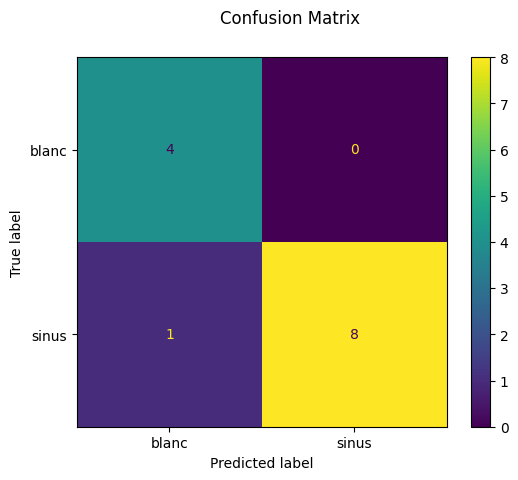

In [173]:
#Entrainement avec le set de training
launch_model(SVC())

<h2> Test d'un modèle Random Forest </h2>

Comme prédictions, nous obtenons les résultats suivants : 
['sinus' 'blanc' 'blanc' 'sinus' 'sinus' 'blanc' 'sinus' 'sinus' 'blanc'
 'blanc' 'blanc' 'sinus' 'blanc']
En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : 
1.0.
Matrice de confusion:
[[7 0]
 [0 6]]


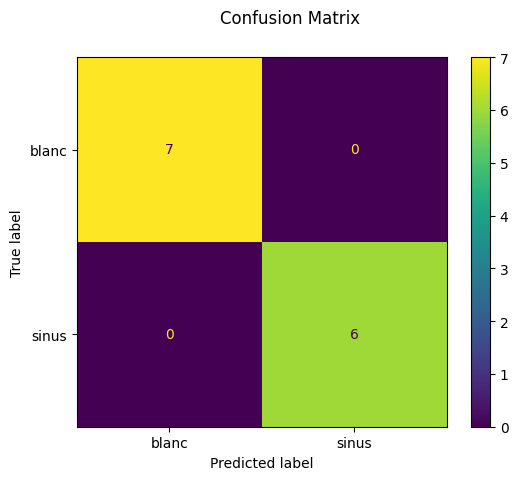

In [162]:
from sklearn.ensemble import RandomForestClassifier

launch_model(RandomForestClassifier(n_estimators=100))

<h2>Test du modele Gaussian Naive Bayes</h2>

Comme prédictions, nous obtenons les résultats suivants : 
['sinus' 'blanc' 'blanc' 'sinus' 'sinus' 'blanc' 'sinus' 'sinus' 'blanc'
 'blanc' 'blanc' 'sinus' 'blanc']
En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : 
1.0.
Matrice de confusion:
[[7 0]
 [0 6]]


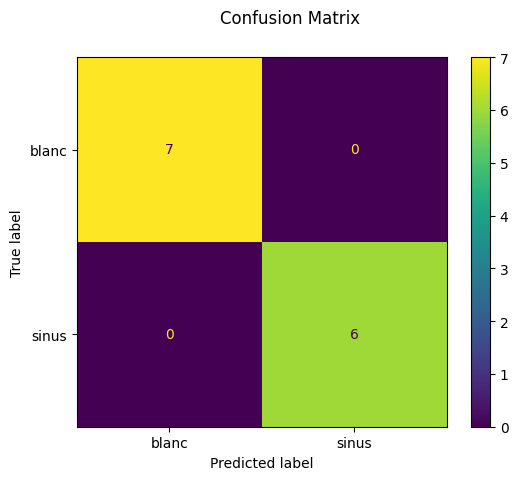

In [163]:
from sklearn.naive_bayes import GaussianNB

launch_model(GaussianNB())

<h2>Test d'un réseau de neurones</h2>

In [164]:
from keras.utils import to_categorical
y_train.replace(to_replace="sinus",
           value=0, inplace=True)
y_train.replace(to_replace="blanc",
           value=1, inplace=True)
y_test.replace(to_replace="sinus",
           value=0, inplace=True)
y_test.replace(to_replace="blanc",
           value=1, inplace=True)

In [165]:
from keras.models import Sequential
from keras.layers import Dense


def initialize_model():   
    # Define the model
    model = Sequential([
        # First layer with 5 neurons, relu activation and input shape
        Dense(5, activation='relu', input_dim = X_train.shape[1]),
        # Output layer for 2-class classification
        Dense(1, activation='sigmoid')
    ])
    return model

model = initialize_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    X_train, y_train,
    batch_size=2,
    epochs=50,
    validation_split=0.3
)


Epoch 1/50


C:\Users\utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


13/13 [==============================] - 2s 41ms/step - loss: 0.4421 - accuracy: 0.7200 - val_loss: 0.4810 - val_accuracy: 0.9167
Epoch 2/50
13/13 [==============================] - 0s 9ms/step - loss: 0.3450 - accuracy: 0.9200 - val_loss: 0.4136 - val_accuracy: 1.0000
Epoch 3/50
13/13 [==============================] - 0s 10ms/step - loss: 0.2868 - accuracy: 1.0000 - val_loss: 0.3561 - val_accuracy: 1.0000
Epoch 4/50
13/13 [==============================] - 0s 10ms/step - loss: 0.2468 - accuracy: 1.0000 - val_loss: 0.3056 - val_accuracy: 1.0000
Epoch 5/50
13/13 [==============================] - 0s 11ms/step - loss: 0.2109 - accuracy: 1.0000 - val_loss: 0.2534 - val_accuracy: 1.0000
Epoch 6/50
13/13 [==============================] - 0s 10ms/step - loss: 0.1729 - accuracy: 1.0000 - val_loss: 0.2091 - val_accuracy: 1.0000
Epoch 7/50
13/13 [==============================] - 0s 9ms/step - loss: 0.1427 - accuracy: 1.0000 - val_loss: 0.1687 - val_accuracy: 1.0000
Epoch 8/50
13/13 [========